In [175]:
import praw
import os
import requests
import pandas as pd
import json
import datetime as dt
import numpy as np
from pathlib import Path
from praw.models import MoreComments
from datetime import datetime
import json
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
asx = pd.read_csv('asx_comments_with_sentiment.csv')

In [11]:
asx2 = pd.read_csv('asx_comments_new.csv')

In [9]:
asx.head()

,Unnamed: 0,Unnamed: 0.1,comment,negative,neutral,positive,score,type,net_sentiment
0,0,0.0,Ok so here's what I think (please don't take o...,0.401578,0.497629,0.100794,8.0,0.0,-0.300784
1,1,1.0,Tell me your argument as to why it's a good in...,0.708158,0.242347,0.049495,2.0,0.0,-0.658663
2,2,2.0,One reason you shouldn't increase your stake n...,0.647415,0.316412,0.036174,1.0,0.0,-0.611241
3,3,3.0,Go with your gut mate. $2k isn't going to be m...,0.315508,0.623733,0.060759,1.0,0.0,-0.254749
4,4,4.0,What do they do? Why do you think they’re a go...,0.139558,0.810770,0.049672,1.0,0.0,-0.089885


In [5]:
asx['net_sentiment'] = asx['positive'] - asx['negative']


Bad key "text.kerning_factor" on line 4 in
C:\Users\jayri\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


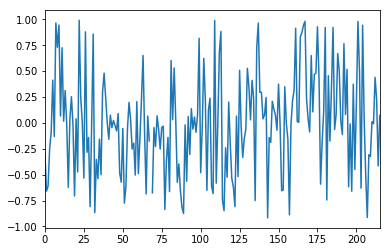

In [7]:
asx['net_sentiment'].plot()

In [15]:
asx_merge = pd.merge(asx, asx2, on='comment', how='left')

In [22]:
asx_merge.dropna()

,Unnamed: 0_x,Unnamed: 0.1,comment,negative,neutral,positive,score_x,type_x,net_sentiment,Unnamed: 0_y,score_y,type_y,utc
0,0,0.0,Ok so here's what I think (please don't take o...,0.401578,0.497629,0.100794,8.0,0.0,-0.300784,0,9,0,1.522494e+09
1,1,1.0,Tell me your argument as to why it's a good in...,0.708158,0.242347,0.049495,2.0,0.0,-0.658663,1,4,0,1.522510e+09
2,2,2.0,One reason you shouldn't increase your stake n...,0.647415,0.316412,0.036174,1.0,0.0,-0.611241,2,1,0,1.522500e+09
3,3,3.0,Go with your gut mate. $2k isn't going to be m...,0.315508,0.623733,0.060759,1.0,0.0,-0.254749,3,1,0,1.522504e+09
4,4,4.0,What do they do? Why do you think they’re a go...,0.139558,0.810770,0.049672,1.0,0.0,-0.089885,4,1,0,1.522575e+09
5,5,5.0,Small cap I've found; Elmo Software,0.007631,0.572458,0.419911,9.0,2.0,0.412280,5,8,2,1.522491e+09
6,6,0.0,it has a p/e of 144 you better hope it takes o...,0.308931,0.513923,0.177147,11.0,0.0,-0.131784,0,10,0,1.530368e+09
7,7,1.0,"Bought at 5.59, pretty happy",0.001441,0.032438,0.966121,4.0,0.0,0.964680,1,5,0,1.530373e+09
8,8,2.0,I find that Afterpay is the superior service c...,0.030157,0.209808,0.760034,3.0,0.0,0.729877,2,4,0,1.530413e+09
9,9,3.0,"Bought in at $8.80 two weeks ago, hit $10 yest...",0.003452,0.049527,0.947020,4.0,0.0,0.943568,3,4,0,1.530863e+09


In [44]:
#asx_merge['Date'] = datetime.utcfromtimestamp(asx_merge['utc']).strftime('%Y-%m-%d %H:%M:%S')

In [40]:
dates = []
for time in asx_merge['utc']:
    dates.append(datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S'))

In [42]:
asx_merge['Date'] = dates

In [45]:
asx_merge.index = asx_merge['Date']

In [51]:
asx_merge.index = asx_merge.index.date

In [54]:
asx_merge_grouped = (asx_merge[['net_sentiment']].groupby(asx_merge.index).mean())

In [134]:
asx_merge_grouped.head()

,net_sentiment
2018-03-31,-0.282631
2018-04-01,-0.089885
2018-06-30,0.237219
2018-07-01,0.729877
2018-07-04,0.725444


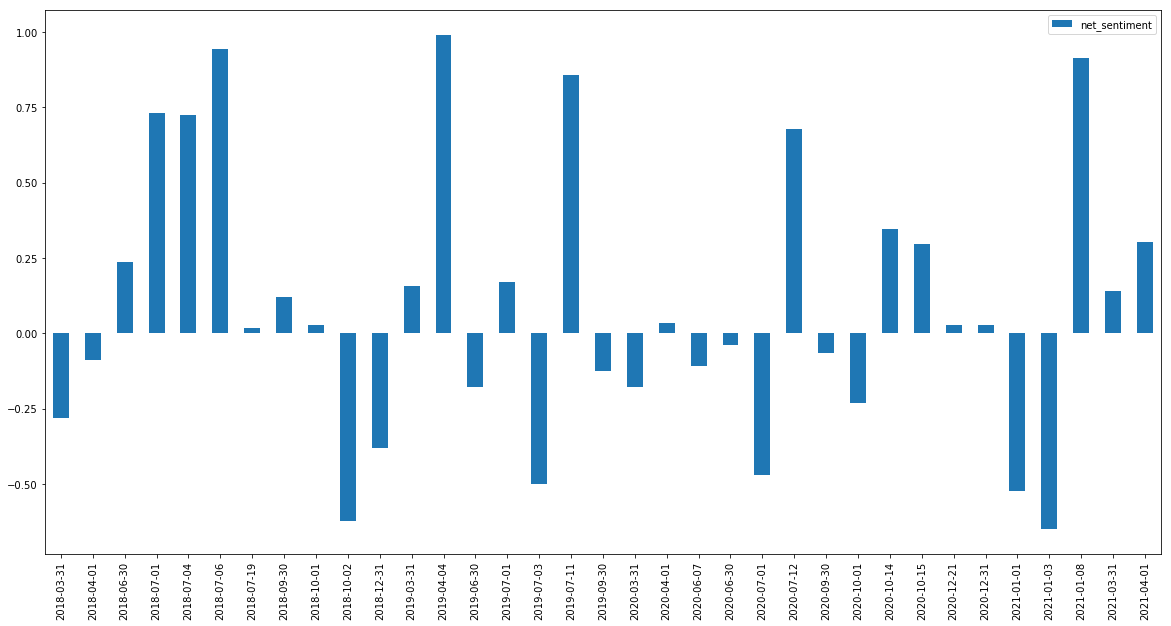

In [176]:
asx_merge_grouped.plot.bar(figsize=(20, 10))
plt.savefig('asx_sentiment.png')

In [154]:
bonds = pd.read_csv('bonds_comments_with_sentiment.csv')
bonds2 = pd.read_csv('bonds_comments_new.csv')
bonds['net_sentiment'] = bonds['positive'] - bonds['negative']
bonds_merge = pd.merge(bonds, bonds2, on='comment', how='left')
bonds_merge = bonds_merge.dropna()
dates = []
for time in bonds_merge['utc']:
    dates.append(datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S'))
bonds_merge['Date'] = dates

In [155]:
bonds_merge.index = bonds_merge['Date']

In [156]:
bonds_merge['Date'] = pd.to_datetime(bonds_merge['Date'], utc=True)
bonds_merge.set_index('Date', inplace=True)

In [157]:
bonds_merge.index = bonds_merge.index.date

In [158]:
bonds_merge_grouped = (bonds_merge[['net_sentiment']].groupby(bonds_merge.index).mean())

In [159]:
bonds_merge_grouped.head()

,net_sentiment
2016-04-11,-0.378267
2016-04-20,-0.022664
2016-05-08,0.063288
2017-10-23,-0.274537
2018-01-08,-0.459493


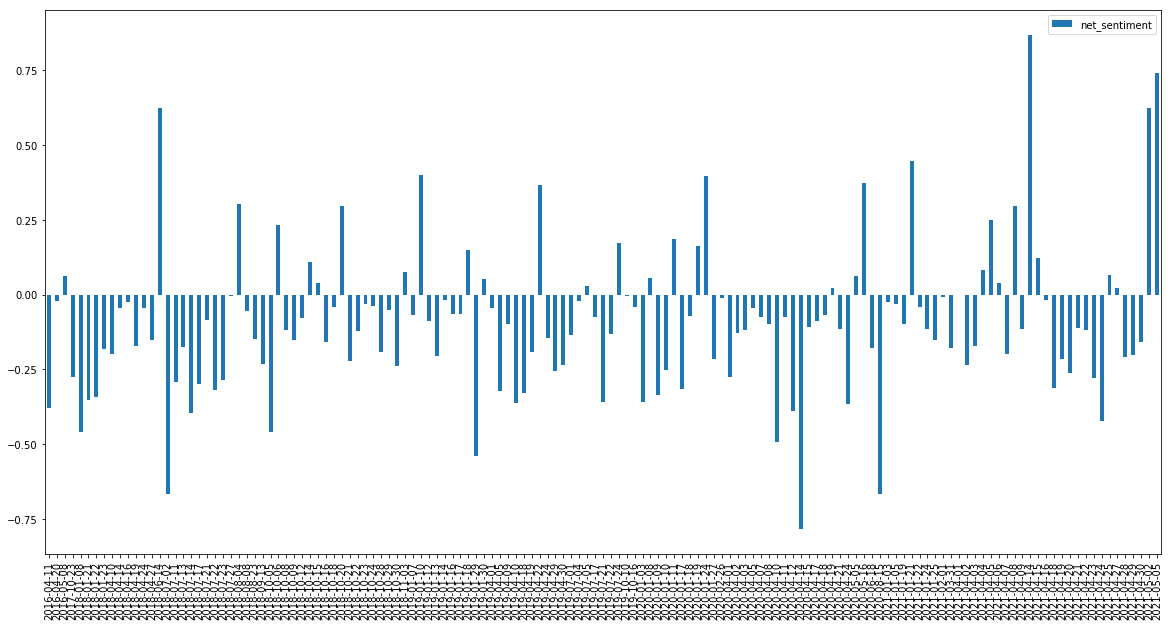

In [177]:
bonds_merge_grouped.plot.bar(figsize=(20, 10))
plt.savefig('bonds_sentiment.png')

In [101]:
btc = pd.read_csv('bitcoin_comments_with_sentiment.csv')
btc2 = pd.read_csv('bitcoin_comments_new.csv')
btc['net_sentiment'] = btc['positive'] - btc['negative']
btc_merge = pd.merge(btc, btc2, on='comment', how='left')
btc_merge['utc'].isna().sum()

206

In [103]:
btc_merge = btc_merge.dropna()
btc_merge['utc'].isna().sum()

0

In [110]:
dates = []
for time in btc_merge['utc']:
    dates.append(datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S'))
btc_merge['Date'] = dates

In [111]:
btc_merge.index = btc_merge['Date']
btc_merge['Date'] = pd.to_datetime(btc_merge['Date'], utc=True)
btc_merge.set_index('Date', inplace=True)

In [151]:
btc_merge.index = btc_merge.index.date

In [152]:
btc_merge_grouped = (btc_merge[['net_sentiment']].groupby(btc_merge.index).mean())

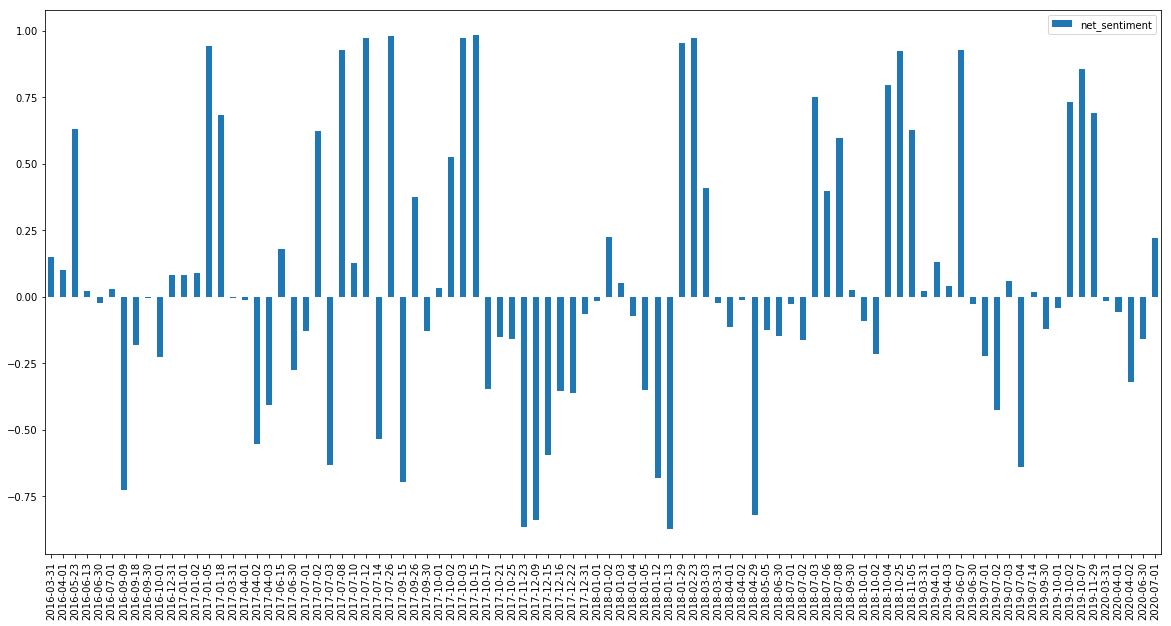

In [178]:
btc_merge_grouped.plot.bar(figsize=(20, 10))
plt.savefig('btc_sentiment.png')

In [170]:
prop = pd.read_csv('property_comments_with_sentiment.csv')
prop2 = pd.read_csv('property_comments_new.csv')
prop['net_sentiment'] = prop['positive'] - prop['negative']
prop_merge = pd.merge(prop, prop2, on='comment', how='left')
prop_merge = prop_merge.dropna()
dates = []
for time in prop_merge['utc']:
    dates.append(datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S'))

In [171]:
prop_merge['Date'] = dates
prop_merge.index = prop_merge['Date']
prop_merge['Date'] = pd.to_datetime(prop_merge['Date'], utc=True)
prop_merge.set_index('Date', inplace=True)

In [172]:
prop_merge.index = prop_merge.index.date

In [173]:
prop_merge_grouped = (prop_merge[['net_sentiment']].groupby(prop_merge.index).mean())

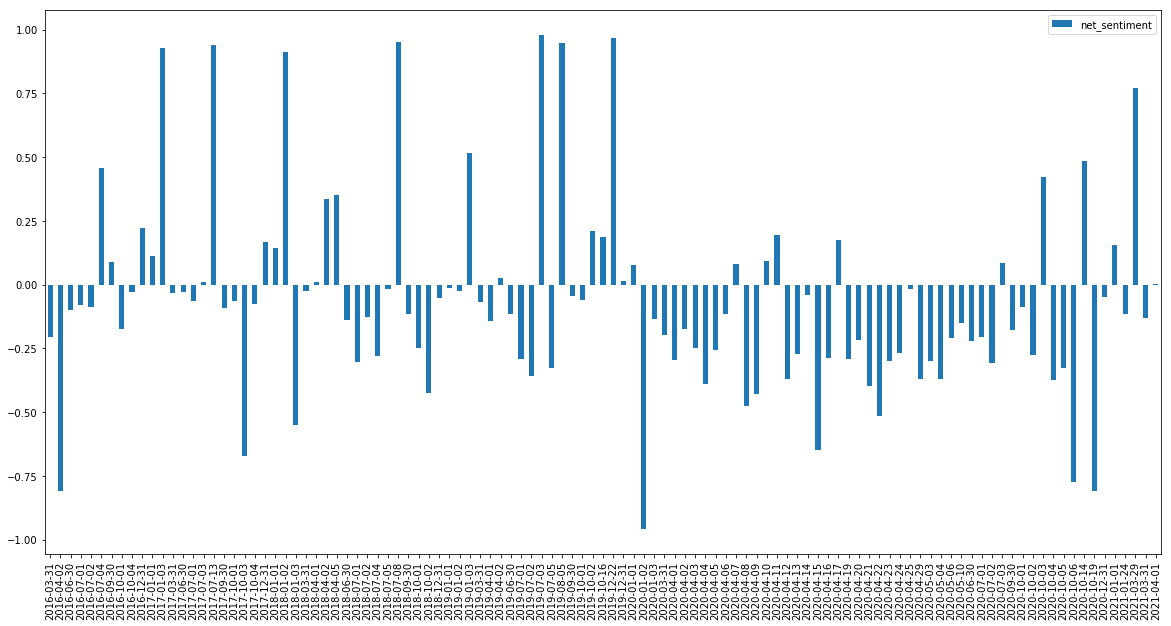

In [179]:
prop_merge_grouped.plot.bar(figsize=(20, 10))
plt.savefig('property_sentiment.png')

In [126]:
card = pd.read_csv('mtg_comments_with_sentiment.csv')
card2 = pd.read_csv('mtg_comments_new.csv')
card['net_sentiment'] = card['positive'] - card['negative']
card_merge = pd.merge(card, card2, on='comment', how='left')
card_merge = card_merge.dropna()
dates = []
for time in card_merge['utc']:
    dates.append(datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S'))
card_merge['Date'] = dates
card_merge.index = card_merge['Date']
card_merge['Date'] = pd.to_datetime(card_merge['Date'], utc=True)
card_merge.set_index('Date', inplace=True)

In [165]:
card_merge.index = card_merge.index.date

In [166]:
card_merge_grouped = (card_merge[['net_sentiment']].groupby(card_merge.index).mean())

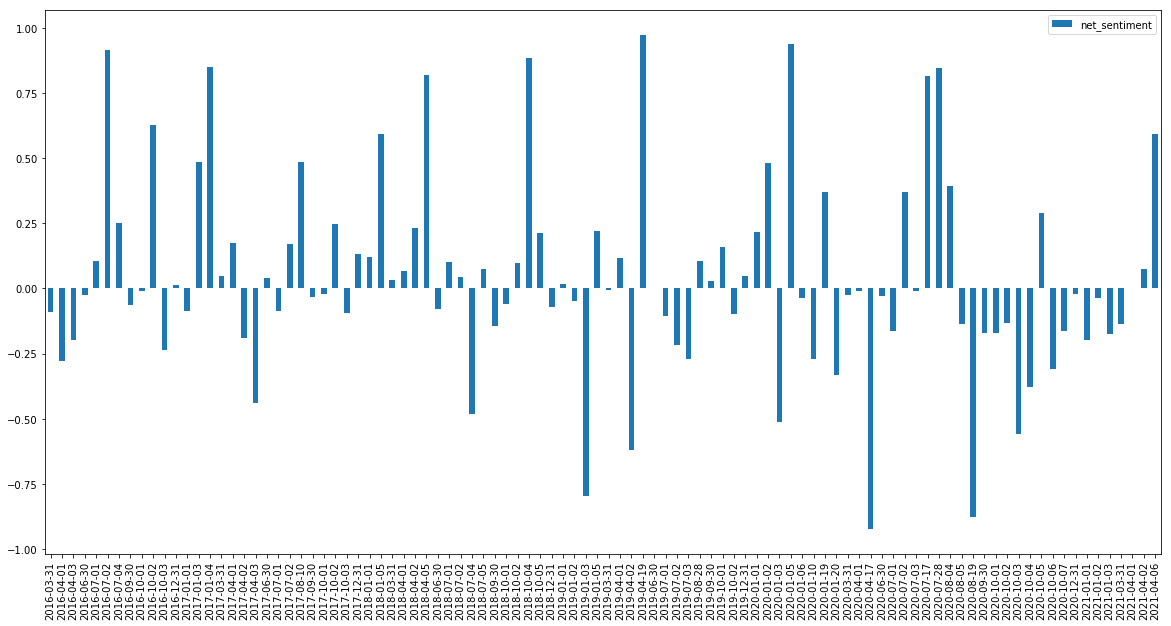

In [180]:
card_merge_grouped.plot.bar(figsize=(20, 10))
plt.savefig('mtg_sentiment.png')